## Overview
The Mann-Whitney Test is a non-parametric test for differences between samples. This means it can be employed like an independent samples T-test but on samples that violate the assumpiton of normality. It is a rank test, which means it can be used on interval or ratio data but also on ordinal data. Mann-Whitney allows you to test the null hypothesis that a randomly selected value from one distribution (represented by sample 1) is just as likely to be less than as greater than a randomly selected value from a second distrubiton (represented by sample 2). Another way of stating this null hypothesis is that the there is no difference between the distributions the two samples came from. There is a generalization of Mann-Whitney for testing more than two groups like ANOVA called *Kruskal–Wallis One-Way ANOVA*. Mann-Whitney makes the following assumptions:

* The data has ordinal, interval, or ratio measurement scales.
* The observations in the groups are independent.

After this notebook you will know:
* how to conduct a Mann-Whitney Test between two independent groups of ordinal, interval, or ratio data.

**In addition, you will know how to perform the Shapiro Wilk Test for normality.**

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Are wines produced in the United States better than wines produced elsewhere?

The following cell will import the wine enthusist data set using pandas. The data is formated as a CSV (comma-separated-values) file. Such a file could be opend in Excel but here we simply load the file into a pandas data structure called a dataframe and print out the first couple rows of the dataframe.

We will proceed to test the data to expore if wines produced in the United States achieve higher point scores than wines produced in other countries using Mann-Whitney Rank Tests. 

* H<sub>0</sub>: Wines produced in the US score no better than wines produced in [INSERT COUNTRY].
* H<sub>A</sub>: Wines produced in the US score better than wines produced in [INSERT COUNTRY].

In [4]:
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/winemag-data-130k-v2.tar.gz"
wine_data = pd.read_csv(url, compression='gzip')
wine_data.head(7)

,winemag-data-130k-v2.csv,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0.0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1.0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2.0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3.0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4.0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5.0,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6.0,Italy,"Here's a bright, informal red that opens with ...",Belsito,87.0,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


In [7]:
# Let's being by looking at the set of all countries contained in the data
set(wine_data['country'])

# could also use: 
# wine_data['country'].unique()

{'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Egypt',
 'England',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Israel',
 'Italy',
 'Lebanon',
 'Luxembourg',
 'Macedonia',
 'Mexico',
 'Moldova',
 'Morocco',
 'New Zealand',
 'Peru',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Switzerland',
 'Turkey',
 'US',
 'Ukraine',
 'Uruguay',
 nan}

In [18]:
# Now let's group the wines by country ...
wines_by_country = wine_data.groupby('country')
# .. and pull out the US wines.
US = wines_by_country.get_group('US')
# now get the points data column from the US wines dataframe
US_points = US['points']

### Test for Normality
In the next cell we perform a test called the Shapiro Wilk Test to determine if our data is normally distributed or not. The null hypothesis of the Shapiro Wilk Test is as follows:

* H<sub>0</sub>: The data **IS** normally distributed.

Thus, if we get a p-value from this test that is less than 0.05 we reject the null and accept the alternative that the data **NOT** normally distributed. If you wish to do a parameteric test on your data then you are "hoping" for a large p-value. This is reverse of the usual situation.

In [19]:
# IS THE US WINE DATA NORMALLY DISTRIBUTED:
statistic, pvalue = stats.shapiro(US_points)
print(statistic, pvalue)

# Note that the pvalue is very small so we must reject the null hypothesis and accept the alternative that the data is 
# NOT normally distributed. The data is probably just ordinal anyway which procludes using T-tests.

0.9872928261756897 0.0


### Mann Whitney U-Test
In the next cell we perform a Mann Whitney U-Test comparing the point scores of US wines to wines from Austrailia. Read about the parameters passed to the stats function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).

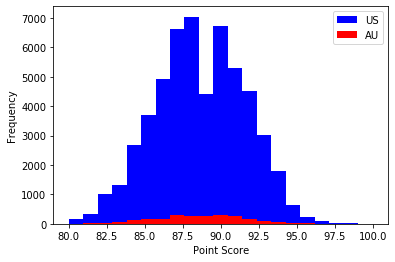

U-statistic: 63386324.0  p-value: 0.5431213475514485


In [23]:
# Let's pull out some other countries and test them.
AU = wines_by_country.get_group('Australia')
AU_points = AU['points']
plt.hist(US_points,bins=21,color='b',alpha=1) 
plt.hist(AU_points,bins=21,color='r',alpha=1)

plt.xlabel('Point Score')
plt.ylabel('Frequency')
plt.legend(['US','AU'])
plt.show()

# The alternative refers to the first data set compared to the second.
u, p = stats.mannwhitneyu(US_points, AU_points, alternative='greater')
print('U-statistic:',u,' p-value:',p)

### Interpreting the Results
Since the p-value is greater than 0.05, we accept the null hypothesis. Wines made in the US are not better (score wise) than wines made in Australia. Let's try some comparisons to some other countries.

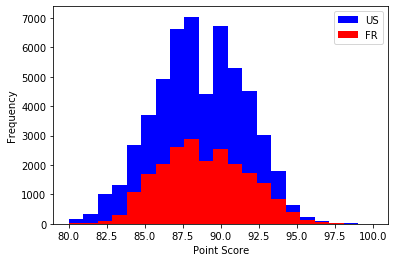

U-statistic: 578771773.5  p-value: 1.0


In [24]:
FR_points = wines_by_country.get_group('France')['points']
plt.hist(US_points,bins=21,color='b',alpha=1) 
plt.hist(FR_points,bins=21,color='r',alpha=1)
plt.xlabel('Point Score')
plt.ylabel('Frequency')
plt.legend(['US','FR'])
plt.show()

u, p = stats.mannwhitneyu(US_points, FR_points, alternative='greater')
print('U-statistic:',u,' p-value:',p)

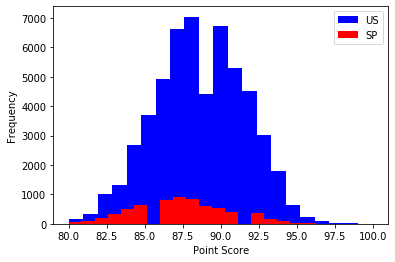

U-statistic: 222623606.0  p-value: 1.9351314467639052e-207


In [25]:
SP_points = wines_by_country.get_group('Spain')['points']
plt.hist(US_points,bins=21,color='b',alpha=1) 
plt.hist(SP_points,bins=21,color='r',alpha=1)
plt.xlabel('Point Score')
plt.ylabel('Frequency')
plt.legend(['US','SP'])
plt.show()

u, p = stats.mannwhitneyu(US_points, SP_points, alternative='greater')
print('U-statistic:',u,' p-value:',p)

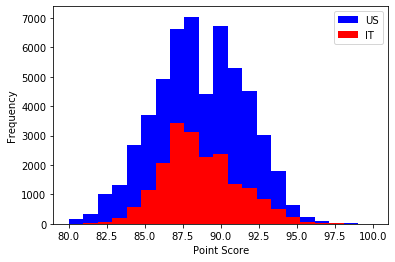

U-statistic: 541434236.0  p-value: 0.00023125328161155092


In [26]:
IT_points = wines_by_country.get_group('Italy')['points']
plt.hist(US_points,bins=21,color='b',alpha=1) 
plt.hist(IT_points,bins=21,color='r',alpha=1)
plt.xlabel('Point Score')
plt.ylabel('Frequency')
plt.legend(['US','IT'])
plt.show()

u, p = stats.mannwhitneyu(US_points, IT_points, alternative='greater')
print('U-statistic:',u,' p-value:',p)

### Interpreting the Results

Based on the tests conducted above, we can conclude that US wines are not better than French wines but are better than Spanish and Italian wines. 